<div align="center">
    <h1>Hotel Reservation Cancellation</h1>
    <h6>by Kalyan Cheerla (11646764)</h6>
</div>

#### Read the CSV Data using Pandas

In [1]:
import pandas

hotelsDF = pandas.read_csv('Hotel Reservations.csv')
hotelsDF

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


#### As it is a Classification, lets plot output classes

<Axes: >

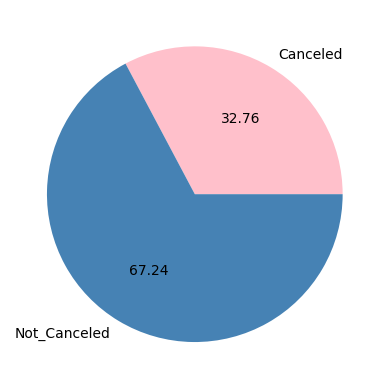

In [2]:
# Plotting the pie chart for output/target
hotelsDF.groupby('booking_status').size().plot(kind='pie', autopct='%.2f', colors=['pink', 'steelblue'])

#### Inspect the Data

In [3]:
# information regarding the columns
hotelsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
# provide the ratio of NULL/NA values present in each column
hotelsDF.isna().sum()/len(hotelsDF)

Booking_ID                              0.0
no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [5]:
# get all unique value counts
for column in hotelsDF.columns:
    print(hotelsDF[column].value_counts())
    print()

INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

Room_Type 1    28130

In [6]:
# Determine if booking id is unique
print(f'Count rows in all columns (mainly Booking_ID column):\n{hotelsDF.count()}\n')
print(f'Count each value counts in Booking_ID:\n{hotelsDF["Booking_ID"].value_counts()}\n')

if len(hotelsDF['Booking_ID'].value_counts()) == hotelsDF.count()[0]:
    print(f'Each booking ID is unique')
else:
    print(f'Repeating Booking ID\'s are present')

Count rows in all columns (mainly Booking_ID column):
Booking_ID                              36275
no_of_adults                            36275
no_of_children                          36275
no_of_weekend_nights                    36275
no_of_week_nights                       36275
type_of_meal_plan                       36275
required_car_parking_space              36275
room_type_reserved                      36275
lead_time                               36275
arrival_year                            36275
arrival_month                           36275
arrival_date                            36275
market_segment_type                     36275
repeated_guest                          36275
no_of_previous_cancellations            36275
no_of_previous_bookings_not_canceled    36275
avg_price_per_room                      36275
no_of_special_requests                  36275
booking_status                          36275
dtype: int64

Count each value counts in Booking_ID:
INN00001    1
INN24

#### Deal with the columns Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, booking_status

In [7]:
# Drop the Booking_ID as each of them are unique and theren't any info to gain
hotelsDF.drop(columns = 'Booking_ID', inplace=True)
hotelsDF

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [8]:
# get the individual classes count
print(hotelsDF['room_type_reserved'].value_counts())

# perform integer encoding for this room_type_reserved column
# as there is inherent order to be preserved.
change_room_type_reserved = {'Room_Type 1': 1,
                             'Room_Type 2': 2,
                             'Room_Type 3': 3,
                             'Room_Type 4': 4,
                             'Room_Type 5': 5,
                             'Room_Type 6': 6,
                             'Room_Type 7': 7}
hotelsDF['room_type_reserved'] = hotelsDF['room_type_reserved'].map(change_room_type_reserved)
hotelsDF

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [9]:
# get the individual classes count
print(hotelsDF['booking_status'].value_counts())

# Do integer encoding for the target
change_booking_status = {'Not_Canceled': 0,
                         'Canceled': 1}
hotelsDF['booking_status'] = hotelsDF['booking_status'].map(change_booking_status)
hotelsDF

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,1,48,2018,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,4,85,2018,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,1,228,2018,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,1,148,2018,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,1,63,2018,4,21,Online,0,0,0,94.50,0,1


In [10]:
# get the individual classes count
print(hotelsDF['type_of_meal_plan'].value_counts())
print(hotelsDF['market_segment_type'].value_counts())

# Do one-hot encoding for other features i.e., type_of_meal_plan & market_segment_type
new_hotelsDF = pandas.get_dummies(hotelsDF, columns=['type_of_meal_plan', 'market_segment_type'])
new_hotelsDF

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,booking_status,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,1,224,2017,10,2,...,0,1,0,0,0,0,0,0,1,0
1,2,0,2,3,0,1,5,2018,11,6,...,0,0,0,0,1,0,0,0,0,1
2,1,0,2,1,0,1,1,2018,2,28,...,1,1,0,0,0,0,0,0,0,1
3,2,0,0,2,0,1,211,2018,5,20,...,1,1,0,0,0,0,0,0,0,1
4,2,0,1,1,0,1,48,2018,4,11,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,4,85,2018,8,3,...,0,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,1,228,2018,10,17,...,1,1,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,1,148,2018,7,1,...,0,1,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,1,63,2018,4,21,...,1,0,0,0,1,0,0,0,0,1


#### Set X features and y target

In [11]:
# set X = features, y = target
X = new_hotelsDF.drop(columns='booking_status')
y = new_hotelsDF['booking_status']
X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,no_of_special_requests,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,1,224,2017,10,2,...,0,1,0,0,0,0,0,0,1,0
1,2,0,2,3,0,1,5,2018,11,6,...,1,0,0,0,1,0,0,0,0,1
2,1,0,2,1,0,1,1,2018,2,28,...,0,1,0,0,0,0,0,0,0,1
3,2,0,0,2,0,1,211,2018,5,20,...,0,1,0,0,0,0,0,0,0,1
4,2,0,1,1,0,1,48,2018,4,11,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,4,85,2018,8,3,...,1,1,0,0,0,0,0,0,0,1
36271,2,0,1,3,0,1,228,2018,10,17,...,2,1,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,1,148,2018,7,1,...,2,1,0,0,0,0,0,0,0,1
36273,2,0,0,3,0,1,63,2018,4,21,...,0,0,0,0,1,0,0,0,0,1


#### Split the Data

In [12]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# split train = 70% & test = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state = 42)

#### Logistic Regression

In [13]:
# perform default Logistic Regression
defaultLRClf = LogisticRegression()
defaultLRClf.fit(X_train, y_train)

y_pred = defaultLRClf.predict(X_test)
print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.6726910706080564
Default accuray: 0.8036387025636313


c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Logistic Regression GridSearchCV
paramsLR = {
    'C': [ 10**-x for x in range(-5, 6)],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs']
}

# fine tune based on F1 score
gridsearchLR = GridSearchCV(LogisticRegression(max_iter=1000), paramsLR, scoring='f1', cv=StratifiedKFold())
gridsearchLR.fit(X_train, y_train)

print(f'Best hyper params and best validation score: {gridsearchLR.best_params_} & {gridsearchLR.best_score_}')

finalLR = gridsearchLR.best_estimator_
y_pred = finalLR.predict(X_test)
print(f'Final test set F1 score: {f1_score(y_test, y_pred)}')
print(f'Final test set accuracy: {accuracy_score(y_test, y_pred)}')

c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not

Best hyper params and best validation score: {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'} & 0.6732106129080652
Final test set F1 score: 0.6870982209597847
Final test set accuracy: 0.8076817054121106


c:\Users\kalyan\win-virtualenvs\bigdata_ds\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


#### Support Vector Machine

In [15]:
from sklearn.svm import SVC

# perform default Support Vector Machine Classifier
defaultSVMClf = SVC()
defaultSVMClf.fit(X_train, y_train)

y_pred = defaultSVMClf.predict(X_test)

print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.5371037463976945
Default accuray: 0.7638518790774602


#### KNN

In [16]:
# perform default KNN
defaultKNNClf = KNeighborsClassifier()
defaultKNNClf.fit(X_train, y_train)

y_pred = defaultKNNClf.predict(X_test)

print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.6830526475496889
Default accuray: 0.8080492511256088


In [17]:
# KNN GridSearchCV
paramsKNN = { 'n_neighbors': [x for x in range(1, 50)] }

gridsearchKNN = GridSearchCV(KNeighborsClassifier(), paramsKNN, scoring='f1', cv=StratifiedKFold())
gridsearchKNN.fit(X_train, y_train)

print(f'Best hyper params and best validation score: {gridsearchKNN.best_params_} & {gridsearchKNN.best_score_}')

finalKNN = gridsearchKNN.best_estimator_
y_pred = finalKNN.predict(X_test)
print(f'Final test set F1 score: {f1_score(y_test, y_pred)}')
print(f'Final test set accuracy: {accuracy_score(y_test, y_pred)}')

Best hyper params and best validation score: {'n_neighbors': 1} & 0.698019150841327
Final test set F1 score: 0.7032356617136508
Final test set accuracy: 0.8036387025636313


#### Random Forest

In [18]:
# perform default Random Forest Classifer
defaultRFClf = RandomForestClassifier()
defaultRFClf.fit(X_train, y_train)

y_pred = defaultRFClf.predict(X_test)

print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.839095550692925
Default accuray: 0.8986492695028945


In [19]:
# Random Forest GridSearchCV
paramsRF = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [100, 150, 200, 250, 500],
    # 'min_samples_split': [2, 3, 4],
    # 'max_depth': [10, 11, 12]
    }

gridsearchRF = GridSearchCV(RandomForestClassifier(), paramsRF, scoring='f1', cv=StratifiedKFold())
gridsearchRF.fit(X_train, y_train)

print(f'Best hyper params and best validation score: {gridsearchRF.best_params_} & {gridsearchRF.best_score_}')

finalRF = gridsearchRF.best_estimator_
y_pred = finalRF.predict(X_test)
print(f'Final test set F1 score: {f1_score(y_test, y_pred)}')
print(f'Final test set accuracy: {accuracy_score(y_test, y_pred)}')

Best hyper params and best validation score: {'criterion': 'entropy', 'n_estimators': 500} & 0.8370190576312408
Final test set F1 score: 0.8416921064108154
Final test set accuracy: 0.8999356795001379


#### XG Boost

In [20]:
# perform default Extreme Gradient Boosting Classifer
defaultXGBClf = XGBClassifier()
defaultXGBClf.fit(X_train, y_train)

y_pred = defaultXGBClf.predict(X_test)

print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.8328249818445898
Default accuray: 0.894238720940917


In [21]:
# Extreme Gradient Boosting GridSearchCV
paramsXGB = {
    'n_estimators': [150, 200, 250],
    'learning_rate': [0.08, 0.09, 0.095, 0.1],
    'max_depth': [11, 12, 13]
    }

gridsearchXGB = GridSearchCV(XGBClassifier(), paramsXGB, scoring='f1', cv=StratifiedKFold())
gridsearchXGB.fit(X_train, y_train)

print(f'Best hyper params and best validation score: {gridsearchXGB.best_params_} & {gridsearchXGB.best_score_}')

finalXGB = gridsearchXGB.best_estimator_
print(finalXGB)
y_pred = finalXGB.predict(X_test)
print(f'Final test set F1 score: {f1_score(y_test, y_pred)}')
print(f'Final test set accuracy: {accuracy_score(y_test, y_pred)}')

Best hyper params and best validation score: {'learning_rate': 0.09, 'max_depth': 12, 'n_estimators': 200} & 0.8360645659220035
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Final test set F1 score: 0.8413753250505634
Final test set accuracy: 0.8991087016447671


#### After Normalization

In [43]:
from sklearn import preprocessing

normalizer = preprocessing.Normalizer().fit(X)
X_norm = normalizer.transform(X)

# split train = 70% & test = 30%
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, stratify=y, random_state=42)

# perform default Random Forest Classifer
finalRFClf = RandomForestClassifier(criterion='entropy', n_estimators=500)
finalRFClf.fit(X_train, y_train)

y_pred = finalRFClf.predict(X_test)

print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.8432259005395946
Default accuray: 0.9012220894973813


#### Extras

In [27]:
# perform default Extra Trees Classifer
defaultETClf = ExtraTreesClassifier()#criterion='entropy')#, n_estimators=100)
defaultETClf.fit(X_train, y_train)

y_pred = defaultETClf.predict(X_test)

print(f'Default F1 score: {f1_score(y_test, y_pred)}')
print(f'Default accuray: {accuracy_score(y_test, y_pred)}')

Default F1 score: 0.8289838168829275
Default accuray: 0.8922172195166774
